Trend Analysis

In [2]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv(r'/Users/srinivasanc/Downloads/datasets/Viral_Social_Media_Trends.csv')

In [4]:
data.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [5]:
data.isnull().sum()

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

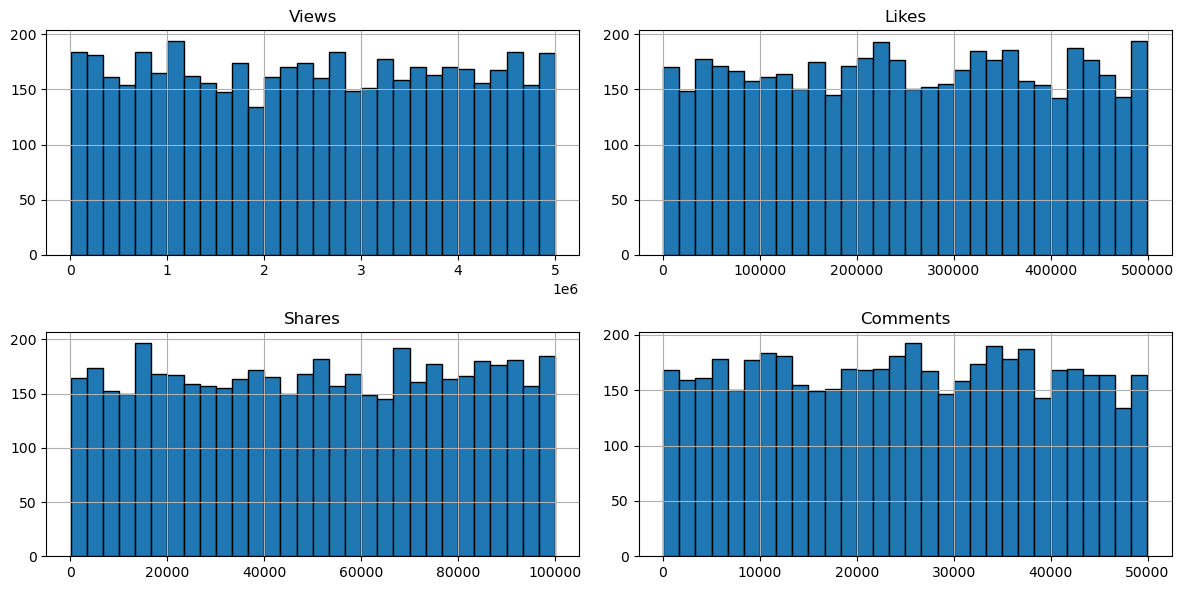

/var/folders/hl/jnm75lz146xfgkx412q2nv_c0000gn/T/ipykernel_97991/3850217810.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Platform", order=data["Platform"].value_counts().index, palette="viridis")


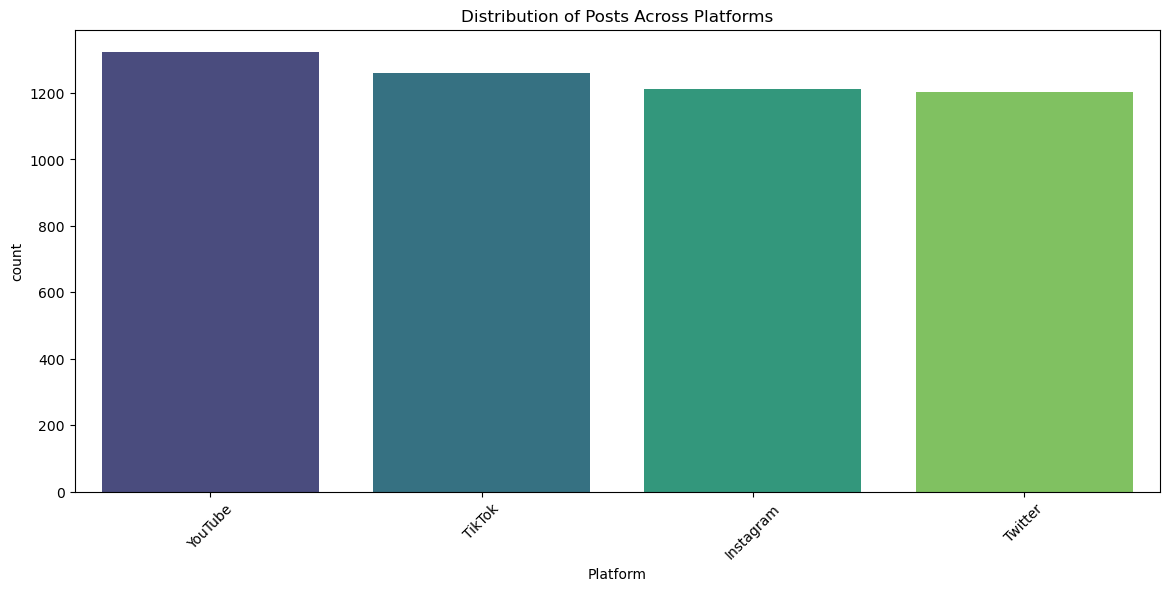

In [10]:
# Plot distribution of numerical features
plt.figure(figsize=(12, 6))
data[['Views', 'Likes', 'Shares', 'Comments']].hist(bins=30, figsize=(12, 6), layout=(2, 2), edgecolor='black')
plt.tight_layout()
plt.show()

# Check categorical feature distributions
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x="Platform", order=data["Platform"].value_counts().index, palette="viridis")
plt.title("Distribution of Posts Across Platforms")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

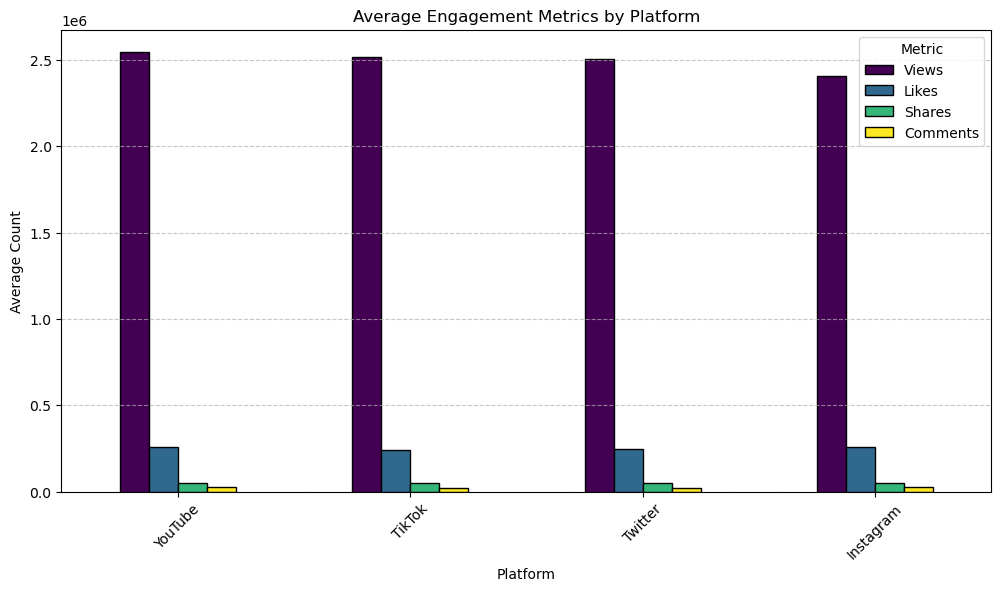

,Views,Likes,Shares,Comments
Platform,,,,
YouTube,2.545648e+06,258314.002266,50073.091390,25321.390483
TikTok,2.515015e+06,244206.719841,51468.256349,24778.696825
Twitter,2.506005e+06,245880.118771,50227.750831,24456.857143
Instagram,2.404080e+06,257118.217822,50310.909241,24958.113861


In [11]:
# Aggregate engagement metrics by platform
platform_trends = data.groupby("Platform")[["Views", "Likes", "Shares", "Comments"]].mean().sort_values("Views", ascending=False)

# Visualize trends across platforms
plt.figure(figsize=(12, 6))
platform_trends.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Average Engagement Metrics by Platform")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display platform trends
platform_trends

<Figure size 1200x600 with 0 Axes>

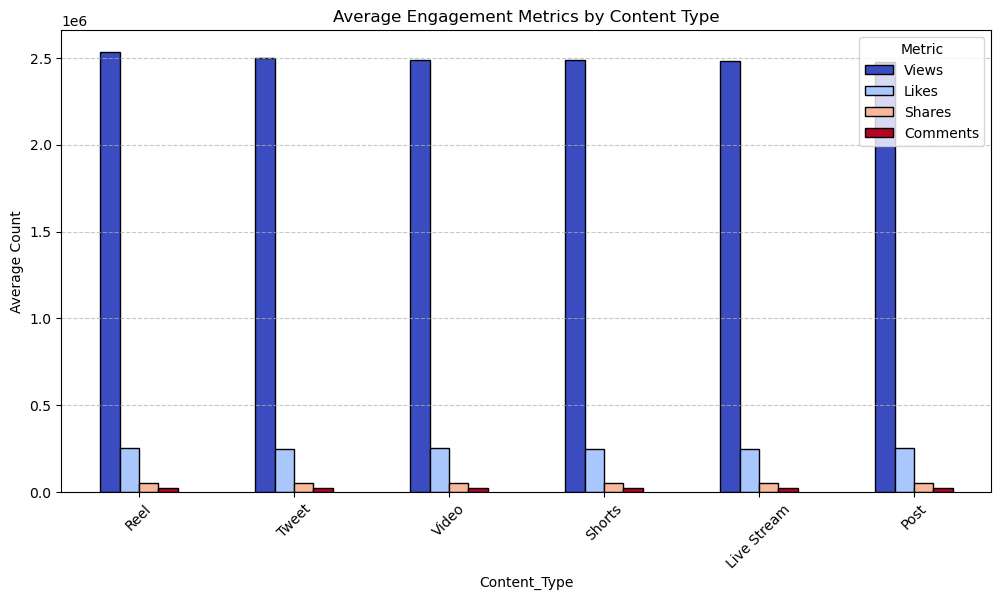

,Views,Likes,Shares,Comments
Content_Type,,,,
Reel,2.533269e+06,255011.068966,51357.868014,25223.405470
Tweet,2.500387e+06,249384.470096,51427.454545,24635.985646
Video,2.489009e+06,254768.923913,50614.386473,24694.614734
Shorts,2.486351e+06,247926.202033,49593.954257,25060.411690
Live Stream,2.481009e+06,248811.616374,49921.960234,25167.635088
Post,2.474337e+06,252784.174678,50164.198124,24554.968347


In [12]:
# Aggregate engagement metrics by Content Type
content_trends = data.groupby("Content_Type")[["Views", "Likes", "Shares", "Comments"]].mean().sort_values("Views", ascending=False)

# Visualize trends across content types
plt.figure(figsize=(12, 6))
content_trends.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")
plt.title("Average Engagement Metrics by Content Type")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display content type trends
content_trends

<Figure size 1200x600 with 0 Axes>

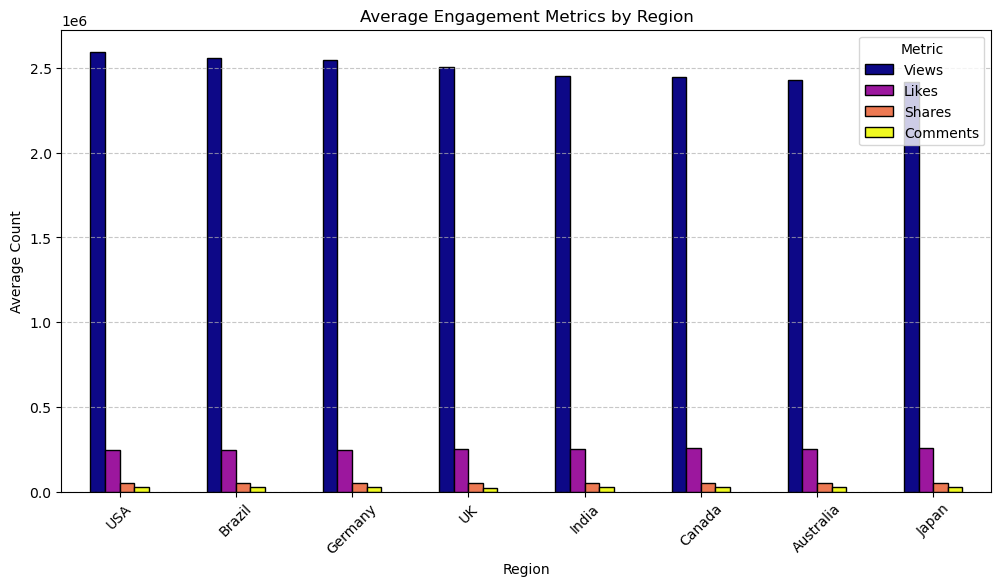

,Views,Likes,Shares,Comments
Region,,,,
USA,2.595202e+06,247135.812408,50634.545052,25286.499261
Brazil,2.557726e+06,248019.753510,50675.541342,24754.538222
Germany,2.546468e+06,244317.392226,49170.302120,24850.975265
UK,2.502361e+06,254020.392581,50462.619784,24110.306028
India,2.452791e+06,250935.309562,50328.191248,25227.580227
Canada,2.443445e+06,256208.664134,50455.468085,25015.653495
Australia,2.428899e+06,254386.139535,50790.504983,25025.559801
Japan,2.415867e+06,256580.846284,51566.586149,24829.773649


In [13]:
# Aggregate engagement metrics by Region
region_trends = data.groupby("Region")[["Views", "Likes", "Shares", "Comments"]].mean().sort_values("Views", ascending=False)

# Visualize trends across regions
plt.figure(figsize=(12, 6))
region_trends.plot(kind="bar", figsize=(12, 6), colormap="plasma", edgecolor="black")
plt.title("Average Engagement Metrics by Region")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display region trends
region_trends

<Figure size 1200x600 with 0 Axes>

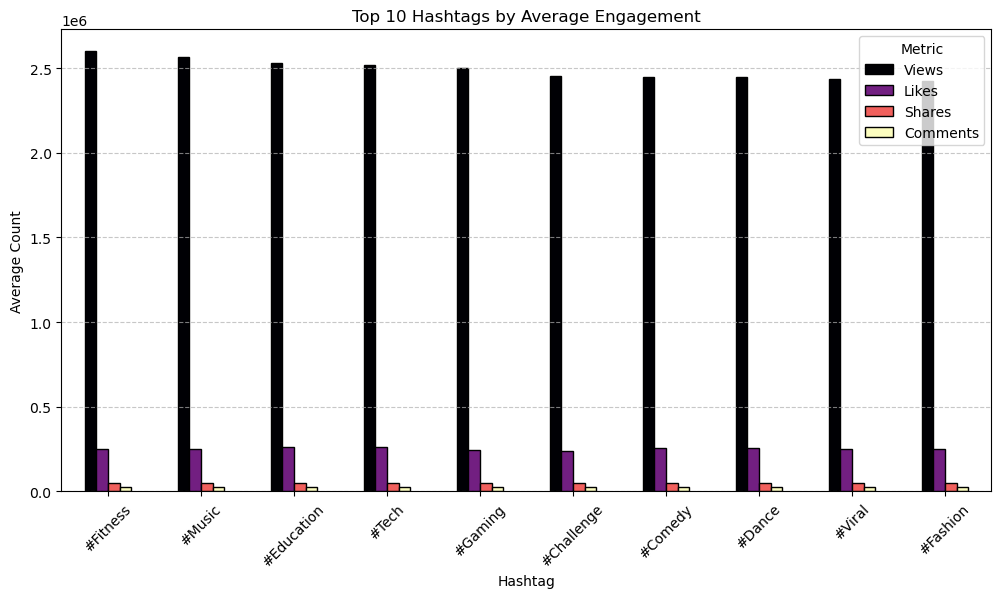

,Views,Likes,Shares,Comments
Hashtag,,,,
#Fitness,2.599391e+06,253130.125000,51183.119403,24532.694030
#Music,2.568759e+06,248012.815416,50965.628803,25024.496957
#Education,2.531228e+06,260423.419048,51748.704762,24684.923810
#Tech,2.516381e+06,260347.148676,48287.209776,25799.549898
#Gaming,2.500699e+06,242819.588727,51360.818372,25332.237996
#Challenge,2.451335e+06,241212.439842,51182.428008,25207.850099
#Comedy,2.450142e+06,253615.746535,49418.049505,24798.885149
#Dance,2.447363e+06,254484.889113,49557.957661,24565.044355
#Viral,2.437590e+06,249964.492723,50428.889813,24776.513514


In [14]:
# Aggregate engagement metrics by Hashtag (Top 10)
top_hashtags = data.groupby("Hashtag")[["Views", "Likes", "Shares", "Comments"]].mean().sort_values("Views", ascending=False).head(10)

# Visualize top hashtags
plt.figure(figsize=(12, 6))
top_hashtags.plot(kind="bar", figsize=(12, 6), colormap="magma", edgecolor="black")
plt.title("Top 10 Hashtags by Average Engagement")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display top hashtag trends
top_hashtags

In [15]:
#ANOMALY DETECTION

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [17]:
data.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [18]:
data.drop(data.columns[0], axis=1)

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
...,...,...,...,...,...,...,...,...,...
4995,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low


In [19]:
# Select numerical features (Exclude non-numeric ones)
data_numeric = data.select_dtypes(include=[np.number])

In [20]:
#Standardize data for better anomaly detection
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [21]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
data["IsoForest_Anomaly"] = iso_forest.fit_predict(data_scaled)

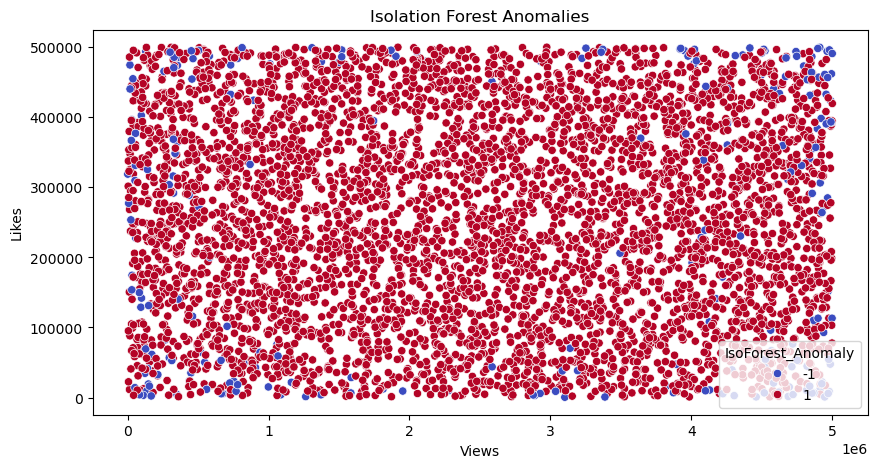

In [22]:
# Visualize Anomalies
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_numeric.iloc[:, 0], y=data_numeric.iloc[:, 1], hue=data["IsoForest_Anomaly"], palette="coolwarm")
plt.title("Isolation Forest Anomalies")
plt.show()

In [23]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
data["LOF_Anomaly"] = lof.fit_predict(data_scaled)

In [24]:
# Count anomalies
print("Isolation Forest Anomalies:", sum(data["IsoForest_Anomaly"] == -1))
print("LOF Anomalies:", sum(data["LOF_Anomaly"] == -1))

Isolation Forest Anomalies: 250
LOF Anomalies: 250


In [25]:
input_dim = data_scaled.shape[1]

In [26]:
# Build Autoencoder Model
autoencoder = Sequential([
    Dense(64, activation="relu", input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(input_dim, activation="linear")
])

/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-13 13:42:31.659737: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-03-13 13:42:31.659760: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-13 13:42:31.659763: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-13 13:42:31.659913: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-13 13:42:31.659922: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] C

In [27]:
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50


2025-03-13 13:42:32.015623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-03-13 13:42:32.018393: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4148 - val_loss: 0.0064
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0446 - val_loss: 0.0057
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0367 - val_loss: 0.0050
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0330 - val_loss: 0.0062
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0306 - val_loss: 0.0050
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0290 - val_loss: 0.0084
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0264 - val_loss: 0.0044
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0262 - val_loss: 0.0051
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0248 - val_loss: 0.0052
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0259 - val_loss: 0.0050
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0237 - val_loss: 0.0067
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.

In [28]:
#Compute Reconstruction Error
reconstructed = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set anomaly threshold
data["Autoencoder_Anomaly"] = mse > threshold

134/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

2025-03-13 13:43:46.606264: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
#Count Anomalies
print("Autoencoder Anomalies:", sum(data["Autoencoder_Anomaly"]))

Autoencoder Anomalies: 250


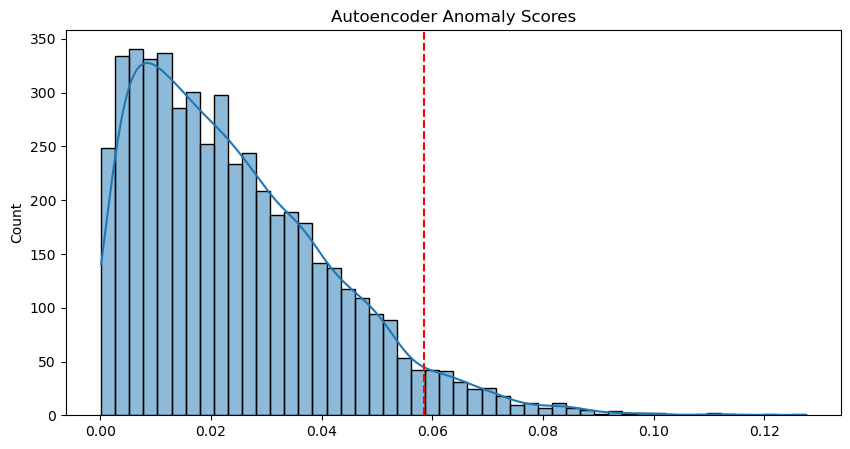

In [30]:
# Visualize Autoencoder Anomalies
plt.figure(figsize=(10, 5))
sns.histplot(mse, bins=50, kde=True)
plt.axvline(threshold, color="red", linestyle="dashed")
plt.title("Autoencoder Anomaly Scores")
plt.show()

In [31]:
anomalies = data[data["Autoencoder_Anomaly"] == True]
print(anomalies)

        Post_ID   Platform     Hashtag Content_Type     Region    Views  \
6        Post_7    YouTube     #Comedy        Tweet      Japan   627233   
42      Post_43    Twitter     #Comedy         Post     Brazil  3961278   
67      Post_68    Twitter      #Dance         Reel      Japan  1059696   
70      Post_71    Twitter      #Dance         Reel      Japan   485214   
71      Post_72  Instagram  #Education        Tweet  Australia  1419701   
...         ...        ...         ...          ...        ...      ...   
4849  Post_4850  Instagram    #Fitness        Tweet      Japan   314695   
4889  Post_4890    Twitter     #Gaming         Reel      India    40996   
4947  Post_4948  Instagram  #Education  Live Stream     Brazil  2445127   
4960  Post_4961  Instagram       #Tech        Tweet    Germany  2964544   
4965  Post_4966    YouTube    #Fashion        Video      Japan   910961   

       Likes  Shares  Comments Engagement_Level  IsoForest_Anomaly  \
6      84121   97973     3264

In [32]:
new_threshold = np.percentile(mse, 97)  # Increase from 95 to 97
data["Autoencoder_Anomaly"] = mse > new_threshold

# Count anomalies after tuning
print("Adjusted Autoencoder Anomalies:", sum(data["Autoencoder_Anomaly"]))

Adjusted Autoencoder Anomalies: 150


In [33]:
data["Anomaly_Agreement"] = (data["Autoencoder_Anomaly"] == True) & (data["IsoForest_Anomaly"] == -1) & (data["LOF_Anomaly"] == -1)
print("Anomalies detected by ALL models:", sum(data["Anomaly_Agreement"]))

Anomalies detected by ALL models: 31


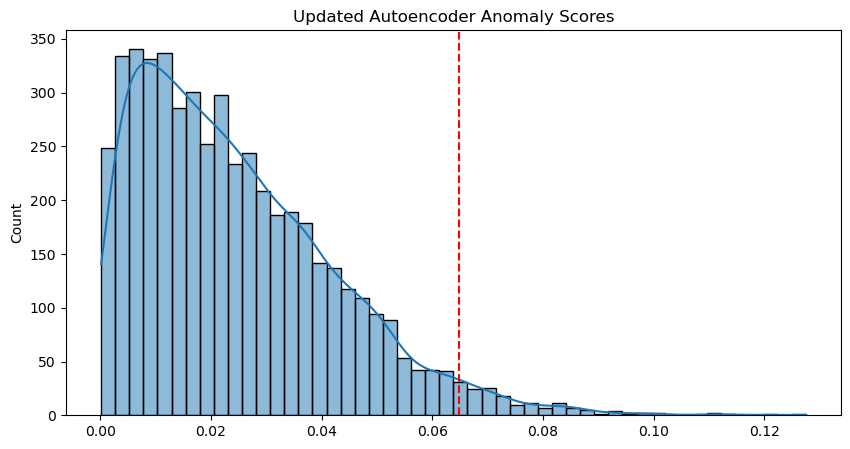

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(mse, bins=50, kde=True)
plt.axvline(new_threshold, color="red", linestyle="dashed")
plt.title("Updated Autoencoder Anomaly Scores")
plt.show()

In [35]:
confirmed_anomalies = data[data["Anomaly_Agreement"] == True]
print(confirmed_anomalies)

        Post_ID   Platform     Hashtag Content_Type     Region    Views  \
67      Post_68    Twitter      #Dance         Reel      Japan  1059696   
91      Post_92    Twitter     #Comedy         Post      India  4567233   
295    Post_296     TikTok    #Fitness  Live Stream      India  4820393   
408    Post_409    YouTube  #Education        Video     Brazil  4687224   
556    Post_557  Instagram    #Fitness         Post    Germany   129205   
697    Post_698  Instagram     #Gaming        Video         UK  4913774   
791    Post_792     TikTok      #Music        Tweet     Canada   149515   
861    Post_862  Instagram    #Fitness       Shorts        USA  3139127   
939    Post_940     TikTok  #Challenge  Live Stream      Japan  4816608   
947    Post_948    YouTube       #Tech       Shorts     Brazil  4288053   
1097  Post_1098    YouTube    #Fashion        Tweet         UK    97528   
1114  Post_1115     TikTok     #Comedy  Live Stream      India   790471   
1151  Post_1152    YouTub

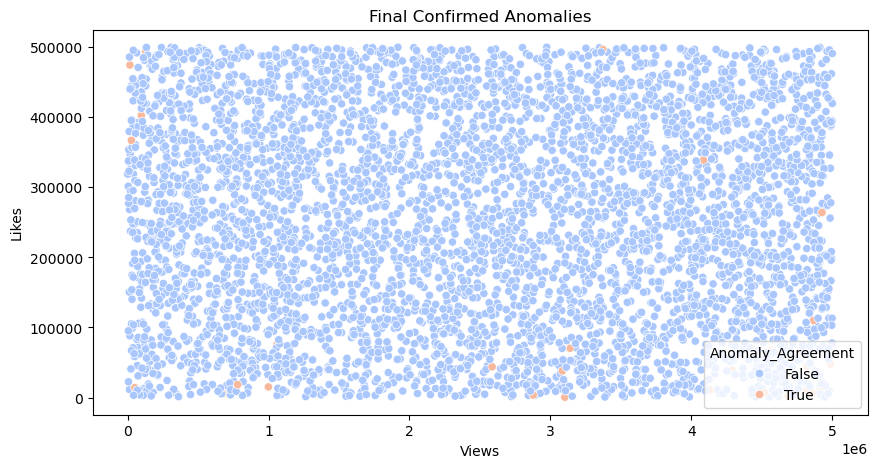

In [68]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_numeric.iloc[:, 0], y=data_numeric.iloc[:, 1], hue=data["Anomaly_Agreement"], palette="coolwarm")
plt.title("Final Confirmed Anomalies")
plt.show()